# TRABAJO PRÁCTICO INTEGRADOR N°1

## Sistema de Análisis de Documentos Digitalizados

---

**Información del Estudiante:**
- **Nombre y Apellido:** Jordi Galmán
- **Fecha de Entrega:** 24 de Septiembre de 2025
- **Materia:** Procesamiento de Imágenes - IFTS24

---

### Objetivo

Desarrollar un sistema básico de análisis automático de documentos digitalizados que integre las técnicas de procesamiento de imágenes estudiadas en el curso.

### Estructura del Trabajo

| Parte | Descripción | Peso |
|-------|-------------|------|
| **1** | Fundamentos Teóricos | 20% |
| **2** | Setup del Entorno | 15% |
| **3** | Análisis de Imágenes | 35% |
| **4** | Preprocessing Básico | 30% |

**Dataset requerido:** 3 imágenes de documentos con diferentes características (buena calidad, rotada, con problemas de iluminación)

---

# PARTE 1: Fundamentos Teóricos

## ¿Por qué Cuadernos Interactivos para IA y Ciencias de Datos?

### Diferencias Metodológicas Fundamentales

El trabajo en inteligencia artificial y ciencias de datos requiere un enfoque metodológico diferente al desarrollo de software tradicional. Mientras que la programación tradicional sigue un flujo lineal y predecible, el trabajo con datos es inherentemente iterativo y exploratorio.

**Programación Tradicional:**
```
Requisitos → Diseño → Implementación → Testing → Producto
```

**Investigación en IA/Datos:**
```
Hipótesis ⟷ Experimento ⟷ Análisis ⟷ Refinamiento ⟷ Nueva Hipótesis
```

### Ventajas de los Cuadernos Interactivos

1. **Narrativa Científica:** Permiten documentar el proceso de pensamiento, no solo el resultado final
2. **Iteración Rápida:** Ejecutar y modificar secciones específicas sin reejecutar todo el programa
3. **Visualización Inmediata:** Ver resultados inmediatamente después de cada paso
4. **Comunicación Efectiva:** Stakeholders no técnicos pueden seguir el proceso y entender decisiones
5. **Reproducibilidad:** Otros investigadores pueden replicar exactamente los experimentos

### Casos de Uso en la Industria

- **Google Research:** Publica papers con cuadernos que permiten reproducir experimentos
- **Netflix:** Usa cuadernos para análisis de datos de usuarios y recomendaciones
- **Uber:** Análisis de patrones de viajes y optimización de rutas
- **Kaggle:** Plataforma completa basada en cuadernos para competencias de machine learning

### Cuándo Usar Cada Herramienta

**Usar Cuadernos para:**
- Análisis exploratorio de datos
- Experimentación y prototipado
- Comunicación de resultados
- Educación y documentación

**Usar Scripts para:**
- Sistemas en producción
- Automatización de tareas repetitivas
- APIs y servicios web
- Pipelines de datos automatizados

En este trabajo práctico, usaremos cuadernos porque estamos en la fase de investigación y experimentación, donde necesitamos entender los datos, probar diferentes enfoques y documentar nuestros hallazgos.

---

# PARTE 2: Setup del Entorno

En esta sección vas a configurar tu entorno de trabajo de manera profesional. Un setup bien hecho te ahorra tiempo y errores durante todo el proyecto.

**Material de consulta:** `Utilidades_y_Plantillas.ipynb`

## 2.1 Importaciones Básicas

Importá las librerías necesarias para procesamiento de imágenes y visualización:

In [23]:
# Importación de las librerías necesarias para el laboratorio
import numpy as np
import cv2
from cv2 import imread
import matplotlib.pyplot as plt
import skimage as ski
from skimage import filters, feature, exposure
from PIL import Image
import urllib.request
from PIL import Image  # Importar la clase Image
import os
from urllib.parse import urlparse

## 2.2 Funciones Utilitarias

Implementá una función básica para cargar y mostrar información de imágenes:

In [24]:
def descargar_imagen(url_imagen):
    # Ruta base fija para la descarga
    DIRECTORIO_DESTINO = "/content/dataset"

    try:
        print(f"\n--- INICIANDO DESCARGA ---")
        print(f"URL de origen: {url_imagen}")
        print(f"Directorio de destino: {DIRECTORIO_DESTINO}")

        # Asegurarse de que el directorio exista. Si no existe, lo crea.
        os.makedirs(DIRECTORIO_DESTINO, exist_ok=True)

        # Definir las extensiones de imagen permitidas
        extensiones_validas = {
            1: ".jpg",
            2: ".png",
            3: ".tiff",
            4: ".pdf"
        }

        # 1. Pedir al usuario que ingrese solo el nombre base
        nombre_base = input("➡️ 1. Por favor, ingresa el nombre para el archivo (sin extensión): ")

        if not nombre_base:
            print("❌ Nombre de archivo no puede estar vacío. Abortando descarga.")
            return

        # 2. Mostrar el menú de selección de formato
        extension_seleccionada = None
        while extension_seleccionada is None:
            print("\n➡️ 2. Selecciona el formato de destino:")
            for numero, extension in extensiones_validas.items():
                print(f"   [{numero}] -> {extension.upper()}")

            seleccion = input("   Ingresa el número de tu opción: ")

            try:
                opcion = int(seleccion)
                if opcion in extensiones_validas:
                    extension_seleccionada = extensiones_validas[opcion]
                else:
                    print("⚠️ Opción inválida. Intenta de nuevo.")
            except ValueError:
                print("⚠️ Entrada inválida. Debes ingresar un número.")

        # 3. Combinar la RUTA base, el nombre base y la extensión elegida
        nombre_archivo_completo = nombre_base + extension_seleccionada

        # Construir la ruta de destino completa usando os.path.join para compatibilidad de SO
        ruta_destino_completa = os.path.join(DIRECTORIO_DESTINO, nombre_archivo_completo)

        print(f"\nGuardando imagen en: {ruta_destino_completa}")

        # 4. Descargar la imagen
        urllib.request.urlretrieve(url_imagen, ruta_destino_completa)

        # 5. Mensaje de éxito
        print(f"\n✅ ¡Descarga completada con éxito!")
        print(f"El archivo se guardó en: {os.path.abspath(ruta_destino_completa)}")

    except Exception as e:
        # Manejo de errores (incluye problemas de red, URL, o permisos del sistema)
        print(f"\n❌ Ocurrió un error durante la descarga: {e}")

# Ejemplo de uso (debes ejecutar esto en un entorno donde exista la ruta, como Google Colab o Linux)
# url_ejemplo = "URL_DE_TU_IMAGEN_AQUI"
# descargar_imagen(url_ejemplo)

In [25]:
def cargar_imagen(ruta):
    """
    Carga una imagen desde la ruta especificada y la convierte al modo RGB.

    Args:
        ruta (str): La ruta completa del archivo de imagen a cargar.

    Returns:
        PIL.Image.Image o None: La imagen cargada en formato RGB,
                                o None si ocurre un error (ej: archivo no encontrado).
    """
    try:
        # 1. Cargar la imagen usando el método 'open' de Pillow
        imagen = Image.open(ruta)

        # 2. Convertir la imagen al modo de color 'RGB'
        # Esto maneja imágenes en escala de grises, CMYK, o con canal Alpha (RGBA)
        # y las fuerza al estándar RGB (3 canales).
        imagen_rgb = imagen.convert('RGB')

        print(f"✅ Imagen cargada y convertida a RGB desde: {ruta}")
        return imagen_rgb

    except FileNotFoundError:
        print(f"❌ ERROR: Archivo no encontrado en la ruta: {ruta}")
        return None
    except Exception as e:
        # Captura cualquier otro error (ej: formato de imagen corrupto o no soportado)
        print(f"❌ ERROR al cargar la imagen desde {ruta}: {e}")
        return None

# ----------------------------------------------------------------------
## EJEMPLO DE USO:

# Para que este ejemplo funcione, debes:
# 1. Asegurarte de tener la librería Pillow instalada: pip install Pillow
# 2. Tener una imagen de prueba (ej: "mi_foto.jpg") en la misma carpeta o proporcionar la ruta correcta.

# --- Preparación para la prueba ---

# Paso 1: Crea una imagen de prueba localmente (usando el gradiente de la respuesta anterior)
# Necesitas la función auxiliar para generar una imagen si no tienes una a mano.


## 2.3 Verificación del Setup

Probá que todo funciona creando una imagen sintética simple:

In [32]:
def crear_imagen_de_prueba(nombre_archivo="imagen_prueba.png"):
    # Crea una imagen 100x100 de color rojo (para tener un archivo válido)
    img = Image.new('RGB', (100, 100), color = 'red')
    img.save(nombre_archivo)
    return nombre_archivo

# Creamos una imagen de prueba para cargar
ruta_de_prueba = crear_imagen_de_prueba()


✅ Imagen cargada y convertida a RGB desde: /content/imagen_prueba.png
✅ Imagen cargada y convertida a RGB desde: imagen_prueba.png

Tipo de objeto devuelto: <class 'PIL.Image.Image'>
Modo de color de la imagen: RGB
Tamaño de la imagen: (100, 100)

Mostrando la imagen cargada:


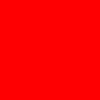

In [35]:
cargar_imagen('/content/imagen_prueba.png')

imagen_cargada = cargar_imagen(ruta_de_prueba)

if imagen_cargada:
    print(f"\nTipo de objeto devuelto: {type(imagen_cargada)}")
    print(f"Modo de color de la imagen: {imagen_cargada.mode}")
    print(f"Tamaño de la imagen: {imagen_cargada.size}")
    # Muestra la imagen usando display() para entornos como Google Colab
    print("\nMostrando la imagen cargada:") # Added print for clarity
    display(imagen_cargada) # Changed show() to display()
else:
    print("❌ No se pudo cargar la imagen.")

In [29]:
# --- Llamada a la función ---

# 1. Llamada exitosa


✅ Imagen cargada y convertida a RGB desde: imagen_prueba.png

Tipo de objeto devuelto: <class 'PIL.Image.Image'>
Modo de color de la imagen: RGB
Tamaño de la imagen: (100, 100)
❌ ERROR: Archivo no encontrado en la ruta: ruta/que/no/existe.jpg

Resultado de llamada fallida: None


---

# PARTE 3: Análisis de Tu Dataset

Ahora vas a trabajar con tu dataset de 3 documentos. Esta parte es clave para entender qué problemas tenés que resolver.

**Preparación del Dataset:**
- Creá una carpeta llamada `dataset/` en la misma ubicación que este notebook
- Incluí exactamente 3 imágenes de documentos:
  1. Una de buena calidad (bien iluminada, recta)
  2. Una rotada o inclinada
  3. Una con problemas (oscura, borrosa, o con sombras)

## 3.1 Carga de las Imágenes

**Material de consulta:** `002/TEO/LeerImagenColor.ipynb`

In [ ]:
url_rotada = 'https://fotora.com.ar/wp-content/uploads/2018/04/9-Norman-Franco-Sanchez-Alvarez.jpg'
url_borrosa = 'https://images.unsplash.com/photo-1635963422426-f802fb6d7240?q=80&w=1171&auto=format&fit=crop&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D'
url_buena = 'https://live.staticflickr.com/4/3095/2899442765_72740be1fb_z.jpg'

In [ ]:
# Define las rutas a tus 3 imágenes
rutas_imagenes = [
    "dataset/imagen1.jpg",  # Buena calidad
    "dataset/imagen2.jpg",  # Rotada
    "dataset/imagen3.jpg"   # Con problemas
]

# Carga las 3 imágenes usando tu función
imagenes = []
nombres = ["Buena Calidad", "Rotada", "Con Problemas"]

# Tu código aquí


## 3.2 Inspección Visual y Análisis

**Material de consulta:** `002/Fundamentos_Imagen_Digital.ipynb`

In [ ]:
# Mostra las 3 imágenes lado a lado con sus nombres
# Usa subplots de matplotlib

# Tu código aquí


In [ ]:
# Para cada imagen, mostrá información básica y un histograma
# Esto te ayuda a entender los problemas de cada una

# Tu código aquí


## 3.3 Identificación de Problemas

Basándote en tu inspección visual, identificá los problemas principales de cada imagen:

**Imagen 1 (Buena Calidad):**
- Problemas identificados: [COMPLETAR]
- Preprocessing necesario: [COMPLETAR]

**Imagen 2 (Rotada):**
- Problemas identificados: [COMPLETAR]
- Preprocessing necesario: [COMPLETAR]

**Imagen 3 (Con Problemas):**
- Problemas identificados: [COMPLETAR]
- Preprocessing necesario: [COMPLETAR]

---

# PARTE 4: Preprocessing Básico

Ahora vas a aplicar técnicas de preprocessing para mejorar cada imagen. Trabajá con una imagen por vez.

## 4.1 Segmentación Básica

Separar el documento del fondo es el primer paso crítico.

**Material de consulta:** `Segmentacion.ipynb` (especialmente las funciones de umbralización)

In [ ]:
# Elegí UNA de tus imágenes para trabajar primero
imagen_trabajo = imagenes[0]  # Cambiá el índice según necesites

# Convertí a escala de grises
# Tu código aquí


In [ ]:
# Aplicá segmentación por umbralización
# Probá diferentes valores hasta encontrar el mejor

# Tu código aquí


In [ ]:
# Mostrá el resultado: original, escala de grises, y máscara
# Tu código aquí


## 4.2 Mejora de Calidad

**Material de consulta:** `Mejora_Imagen_Ecualizacion.ipynb`

In [ ]:
# Si tu imagen tiene problemas de contraste, aplicá ecualización
# Tu código aquí


In [ ]:
# Si tu imagen está rotada, aplicá corrección básica
# Material de consulta: Transformaciones_Geometricas.ipynb

# Tu código aquí


## 4.3 Comparación de Resultados

In [ ]:
# Mostrá lado a lado: imagen original vs imagen procesada
# Tu código aquí


## 4.4 Aplicación a las Otras Imágenes

Repetí el proceso para tus otras 2 imágenes, adaptando las técnicas según los problemas específicos de cada una:

In [ ]:
# Procesamiento de la segunda imagen
# Tu código aquí


In [ ]:
# Procesamiento de la tercera imagen
# Tu código aquí


## 4.5 Resultados Finales

In [ ]:
# Creá un grid mostrando las 3 imágenes originales y las 3 procesadas
# Tu código aquí


---

# REFLEXIÓN FINAL

## Análisis de Resultados

**¿Qué técnica fue más efectiva para cada tipo de problema?**

[COMPLETAR: Reflexioná sobre qué funcionó mejor para cada imagen]

**¿Qué desafíos encontraste durante el procesamiento?**

[COMPLETAR: Mencioná las dificultades técnicas que tuviste]

**¿En qué casos los resultados no fueron óptimos y por qué?**

[COMPLETAR: Sé crítico con tus resultados]

## Aprendizaje Adquirido

**¿Qué conceptos del curso fueron más útiles?**

[COMPLETAR: Conectá con el material visto en clase]

**¿Cómo podrías mejorar este sistema en futuras versiones?**

[COMPLETAR: Pensá en extensiones posibles]

---

## Entregables

1. Este notebook completamente ejecutado con resultados
2. Carpeta `dataset/` con tus 3 imágenes
3. Las reflexiones completadas

**Fecha de entrega:** 24 de Septiembre, 23:59

---